In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_node.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)
from scipy.stats import friedmanchisquare
%matplotlib inline


/usr/local/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
  "ArticularyWordRecognition",
  "BasicMotions",
  "Cricket",
  "ERing",
  "Epilepsy",
  "Heartbeat",
  "JapaneseVowels",
  "LSST",
  "Libras",
  "NATOPS",
  "PEMS-SF",
  "RacketSports",
  "SelfRegulationSCP1",
  "SpokenArabicDigits",
  "UWaveGestureLibrary",
]

models = [
    "RNN",
    "RNNTimestamps",
    "RNNTimestampsDelta",
    "RNNTime2Vec",
    "RNNPE",
    "RNNTPE",
    "RNNLinear",
    "RNNTime2VecDelta",
    "RNNPEDelta",
    "RNNTPEDelta",
    "RNNLinearDelta",
    "Transformer",
    "TransformerTimestamps",
    "TransformerTimestampsDelta",
    "TransformerTime2Vec",
    "TransformerPE",
    "TransformerTPE",
    "TransformerLinear",
    "TransformerTime2VecDelta",
    "TransformerPEDelta",
    "TransformerTPEDelta",
    "TransformerLinearDelta"
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result, datasets_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "weighted"},
)

In [8]:

table_results = {dataset: {model+f"_{pmiss}": round(datasets_result[dataset][model][pmisses.index(pmiss)], 2) for model in models for pmiss in pmisses } for dataset in datasets}
df = pd.DataFrame(table_results)
df.to_excel('results.xlsx')
results["TransformerPEDelta_Libras"]

array([0.05357143, 0.05357143, 0.05357143, 0.05357143, 0.05357143,
       0.05357143, 0.05357143])

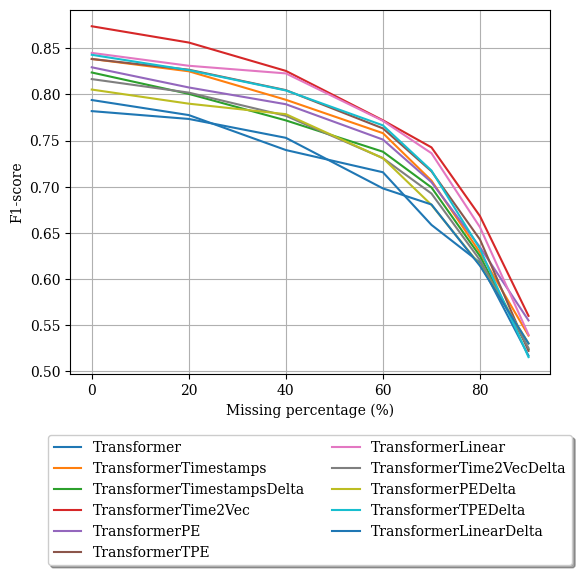

In [5]:
plot_metric(model_mean, metric="F1-score", save_name="transformer_results")

In [7]:
test = []
for pmiss, metrics in pmiss_result.items():
    res = friedmanchisquare(*[metrics[model] for model in models])
    test.append({"pmiss": pmiss, "chi-statistic": res.statistic, "p-value": res.pvalue})
test = pl.DataFrame(test)
test
    

pmiss,chi-statistic,p-value
i64,f64,f64
0,27.172456,0.002446
20,34.409617,0.000157
40,36.193372,0.000078
60,26.440061,0.003191
70,29.878012,0.000897
80,14.854369,0.137462
90,16.456502,0.087289


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


Text(0.5, 1.05, 'Missing percentage: 70%')

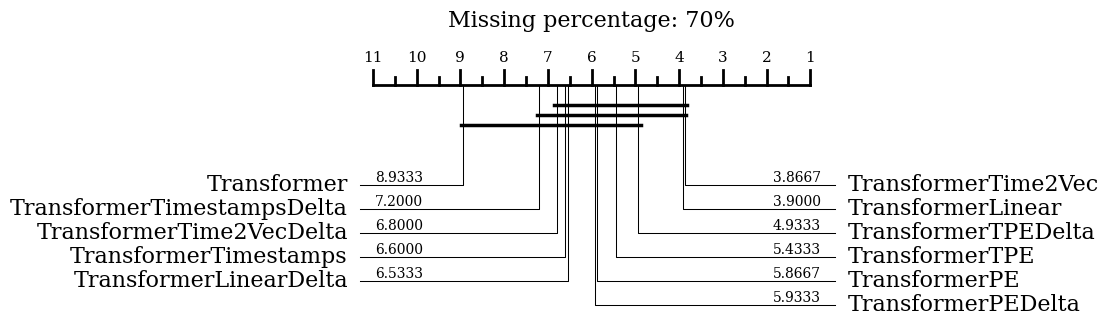

In [75]:
from aeon.visualisation import plot_critical_difference
import CriticalDifferenceDiagrams_jl as cdd
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 70
metric_name = "f1_score"


datasets = [
  "ArticularyWordRecognition",
  "BasicMotions",
  "Cricket",
  "ERing",
  "Epilepsy",
  "Heartbeat",
  "JapaneseVowels",
  "LSST",
  "Libras",
  "NATOPS",
  "PEMS-SF",
  "RacketSports",
  "SelfRegulationSCP1",
  "SpokenArabicDigits",
  "UWaveGestureLibrary",
]

models = [
    # "RNN",
    # "RNNTimestamps",
    # "RNNTimestampsDelta",
    # "RNNTime2Vec",
    # "RNNPE",
    # "RNNTPE",
    # "RNNLinear",
    # "RNNTime2VecDelta",
    # "RNNPEDelta",
    # "RNNTPEDelta",
    # "RNNLinearDelta",
    "Transformer",
    "TransformerTimestamps",
    "TransformerTimestampsDelta",
    "TransformerTime2Vec",
    "TransformerPE",
    "TransformerTPE",
    "TransformerLinear",
    "TransformerTime2VecDelta",
    "TransformerPEDelta",
    "TransformerTPEDelta",
    "TransformerLinearDelta"
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "weighted"},
)
fig, ax, p_values = plot_critical_difference(df.to_numpy(), labels=models, alpha=0.05, return_p_values=True, width=6, textspace=1.25)
fig.suptitle(f"Missing percentage: {pmiss}%",y=1.05, size=16)